Text(0, 0.5, 'Índice do neurônio')

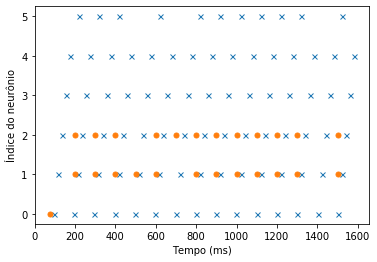

In [36]:
# Porta lógica AND com 2 entradas + clock
# Clock com 5 neurônios (20ms cada neurônio = 100 ms)
# Input com SpikeGeneratorGroup

from brian2 import * 
%matplotlib inline
start_scope() # clears the workspace of previous Brian objects

N = 6 # Número de neurônios (0 a N-1)
vrest = -70.0*mV # Potencial de repouso
tau = 10*ms 
R = 100*Mohm
w_exc = 11*mV # Peso sináptico excitatório
w_exc_AND = 4*mV # Peso sináptico excitatório da porta AND
                 # peso de 8mv para 1 entrada e clock. 4mV para 2 entradas e clock
#w_inh = -10*mV # Peso sináptico inibitório
delay_syn = 20*ms

# Modelo LIF - Leaky Integrate and Fire
eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação de neurônios de estímulo
#indices = array([0, 1, 2, 1, 2,
#                1, 2, 1, 2,
#                1, 2, 1, 2,
#                1, 2, 1, 2,
#                1, 2, 1, 2,
#                1, 2, 1, 2,
#                1, 2, 1, 2])
#times = array([75, 200, 200, 300, 300,
#              400, 400, 500, 500,
#              600, 600, 700, 700,
#              800, 800, 900, 900,
#              1000, 1000, 1100, 1100,
#              1200, 1200, 1300, 1300,
#              1400, 1400, 1500, 1500])*ms

indices = array([0, 1, 2, 1, 2,
                1, 2, 1, 
                1, 2, 2,
                1, 2, 1, 2,
                1, 2, 1, 2,
                1, 2, 1, 2,
                1, 2])
times = array([75, 200, 200, 300, 300,
              400, 400, 500, 
              600, 600, 700,
              800, 800, 900, 900,
              1000, 1000, 1100, 1100,
              1200, 1200, 1300, 1300,
              1500, 1500])*ms


input = SpikeGeneratorGroup(3, indices, times )

# Criação dos neurônios comuns
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=5*ms, method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 

# create stimulus connections
Stimulus = Synapses(input, neurons, on_pre='v_post += w_exc', delay=delay_syn )
Stimulus.connect(i=0, j=0);

#Criação da sinapse excitatória do clock
syn_ex = Synapses(neurons, neurons, on_pre='v_post += w_exc', delay=delay_syn)
syn_ex.connect(i=0, j=1) # Clock
syn_ex.connect(i=1, j=2) 
syn_ex.connect(i=2, j=3)
syn_ex.connect(i=3, j=4)
syn_ex.connect(i=4, j=0)

#Criação das sinapses de porta AND
Stimulus_AND = Synapses(input, neurons, on_pre='v_post += w_exc_AND', delay=delay_syn )
Stimulus_AND.connect(i=1, j=5);
Stimulus_AND.connect(i=2, j=5);
syn_ex_AND = Synapses(neurons, neurons, on_pre='v_post += w_exc_AND', delay=delay_syn)
syn_ex_AND.connect(i=0, j=5) # AND no neurônio 3


#Criação da sinapse inibitória
#syn_in = Synapses(neurons, neurons, on_pre='v_post += w_inh', delay=delay_syn)
#syn_in.connect(i=6, j=0)


#Funções para extrair dados da simulação 
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon = SpikeMonitor(neurons)
rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede

spike_mon_st = SpikeMonitor(input)

#Valores iniciais de tensão e corrente na entrada dos neurônios
#neurons.v = -80*mV
#neurons.I = 0*pA 
run(1600*ms)

plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')

plot(spike_mon_st.t/ms, spike_mon_st.i, 'o', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')


Text(0, 0.5, 'Índice do neurônio')

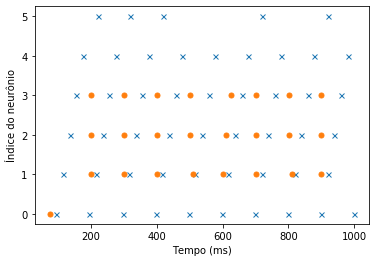

In [37]:
# Porta lógica AND com 3 entradas + clock
# Clock com 5 neurônios (20ms cada neurônio = 100 ms)
# Input com SpikeGeneratorGroup

from brian2 import * 
%matplotlib inline
start_scope() # clears the workspace of previous Brian objects

N = 6 # Número de neurônios (0 a N-1)
vrest = -70.0*mV # Potencial de repouso
tau = 10*ms 
R = 100*Mohm
w_exc = 11*mV # Peso sináptico excitatório
w_exc_AND = 3*mV # Peso sináptico excitatório da porta AND
                 # peso de 8mv para 1 entrada e clock. 4mV para 2 entradas e clock
#w_inh = -10*mV # Peso sináptico inibitório
delay_syn = 20*ms

# Modelo LIF - Leaky Integrate and Fire
eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação de neurônios de estímulo
#Obs: Diferença até 2ms considera como mesmo instante
indices = array([0, 1, 2, 3,
                1, 2, 3,
                1, 2, 3,
                1, 2, 3,
                1, 2, 3,
                1, 2, 3,
                1, 2, 3,
                1, 2, 3])
times = array([75, 200, 200, 200,
              300, 300, 300,
              400, 400, 400,
              510, 500, 500,
              600, 610, 625,
              700, 700, 700,
              810, 801, 802,
              900, 900, 900])*ms
input = SpikeGeneratorGroup(4, indices, times )

# Criação dos neurônios comuns
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=5*ms, method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 

# create stimulus connections
Stimulus = Synapses(input, neurons, on_pre='v_post += w_exc', delay=delay_syn )
Stimulus.connect(i=0, j=0);

#Criação da sinapse excitatória do clock
syn_ex = Synapses(neurons, neurons, on_pre='v_post += w_exc', delay=delay_syn)
syn_ex.connect(i=0, j=1) # Clock
syn_ex.connect(i=1, j=2) 
syn_ex.connect(i=2, j=3)
syn_ex.connect(i=3, j=4)
syn_ex.connect(i=4, j=0)

#Criação das sinapses de porta AND
Stimulus_AND = Synapses(input, neurons, on_pre='v_post += w_exc_AND', delay=delay_syn )
Stimulus_AND.connect(i=1, j=5);
Stimulus_AND.connect(i=2, j=5);
Stimulus_AND.connect(i=3, j=5);
syn_ex_AND = Synapses(neurons, neurons, on_pre='v_post += w_exc_AND', delay=delay_syn)
syn_ex_AND.connect(i=0, j=5)


#Criação da sinapse inibitória
#syn_in = Synapses(neurons, neurons, on_pre='v_post += w_inh', delay=delay_syn)
#syn_in.connect(i=6, j=0)


#Funções para extrair dados da simulação 
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon = SpikeMonitor(neurons)
rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede

spike_mon_st = SpikeMonitor(input)

#Valores iniciais de tensão e corrente na entrada dos neurônios
#neurons.v = -80*mV
#neurons.I = 0*pA 
run(1000*ms)

plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')

plot(spike_mon_st.t/ms, spike_mon_st.i, 'o', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')


Text(0, 0.5, 'Índice do neurônio')

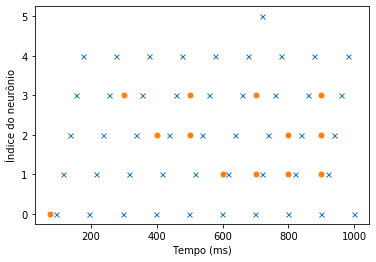

In [46]:
# Porta lógica AND com 3 entradas + clock, sendo a entrada 2 inibitória
# Clock com 5 neurônios (20ms cada neurônio = 100 ms)
# Input com SpikeGeneratorGroup

from brian2 import * 
%matplotlib inline
start_scope() # clears the workspace of previous Brian objects

N = 6 # Número de neurônios (0 a N-1)
vrest = -70.0*mV # Potencial de repouso
tau = 10*ms 
R = 100*Mohm
w_exc = 11*mV # Peso sináptico excitatório
w_exc_AND = 4*mV # Peso sináptico excitatório da porta AND
                 # peso de 8mv para 1 entrada e clock. 4mV para 2 entradas e clock
w_inh_AND = -11*mV
#w_inh = -10*mV # Peso sináptico inibitório
delay_syn = 20*ms

# Modelo LIF - Leaky Integrate and Fire
eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação de neurônios de estímulo
#Obs: Diferença até 2ms considera como mesmo instante?
#input 0 é apenas para disparar o clock
indices = array([0,
                      3,
                   2,
                   2, 3,
                1,
                1,    3,
                1, 2,
                1, 2, 3])
times = array([75,
                        300,
                   400,
                   500, 500,
              600,
              700,      700,
              800, 800,
              900, 900, 900])*ms
input = SpikeGeneratorGroup(4, indices, times )

# Criação dos neurônios comuns
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=5*ms, method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 

# create stimulus connections
Stimulus = Synapses(input, neurons, on_pre='v_post += w_exc', delay=delay_syn )
Stimulus.connect(i=0, j=0);

#Criação da sinapse excitatória do clock
syn_ex = Synapses(neurons, neurons, on_pre='v_post += w_exc', delay=delay_syn)
syn_ex.connect(i=0, j=1) # Clock
syn_ex.connect(i=1, j=2) 
syn_ex.connect(i=2, j=3)
syn_ex.connect(i=3, j=4)
syn_ex.connect(i=4, j=0)

#Criação das sinapses de porta AND
Stimulus_AND = Synapses(input, neurons, on_pre='v_post += w_exc_AND', delay=delay_syn )
Stimulus_AND.connect(i=1, j=5);
Stimulus_AND.connect(i=3, j=5);

Stimulus_AND_inh = Synapses(input, neurons, on_pre='v_post += w_inh_AND', delay=delay_syn )
Stimulus_AND_inh.connect(i=2, j=5);

syn_ex_AND = Synapses(neurons, neurons, on_pre='v_post += w_exc_AND', delay=delay_syn)
syn_ex_AND.connect(i=0, j=5)


#Criação da sinapse inibitória
#syn_in = Synapses(neurons, neurons, on_pre='v_post += w_inh', delay=delay_syn)
#syn_in.connect(i=6, j=0)


#Funções para extrair dados da simulação 
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon = SpikeMonitor(neurons)
rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede

spike_mon_st = SpikeMonitor(input)

#Valores iniciais de tensão e corrente na entrada dos neurônios
#neurons.v = -80*mV
#neurons.I = 0*pA 
run(1000*ms)

plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')

plot(spike_mon_st.t/ms, spike_mon_st.i, 'o', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')

Text(0, 0.5, 'Índice do neurônio')

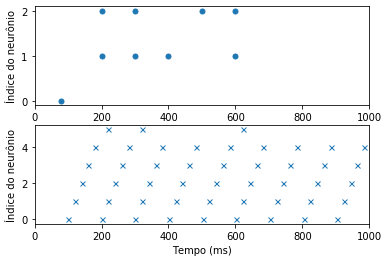

In [54]:
# Porta lógica OR com 2 entradas + clock
# Clock com 5 neurônios (20ms cada neurônio = 100 ms)
# Input com SpikeGeneratorGroup

from brian2 import * 
%matplotlib inline
start_scope() # clears the workspace of previous Brian objects

N = 6 # Número de neurônios (0 a N-1)
vrest = -70.0*mV # Potencial de repouso
tau = 10*ms 
R = 100*Mohm
w_exc = 11*mV # Peso sináptico excitatório
w_exc_OR = 5*mV # Peso sináptico excitatório da porta OR de 2 entradas + clock
#w_inh = -10*mV # Peso sináptico inibitório
delay_syn = 20*ms

# Modelo LIF - Leaky Integrate and Fire
eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação de neurônios de estímulo
indices = array([0, 1, 2, 1, 2,
                1, 2, 1, 2])
times = array([80, 200, 200, 300, 300,
              400, 500, 600, 600])*ms
input = SpikeGeneratorGroup(3, indices, times )

# Criação dos neurônios comuns
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=5*ms, method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 

# create stimulus connections
Stimulus = Synapses(input, neurons, on_pre='v_post += w_exc', delay=delay_syn )
Stimulus.connect(i=0, j=0);

#Criação da sinapse excitatória do clock
syn_ex = Synapses(neurons, neurons, on_pre='v_post += w_exc', delay=delay_syn)
syn_ex.connect(i=0, j=1) # Clock
syn_ex.connect(i=1, j=2) 
syn_ex.connect(i=2, j=3)
syn_ex.connect(i=3, j=4)
syn_ex.connect(i=4, j=0)

#Criação das sinapses de porta OR
Stimulus_OR = Synapses(input, neurons, on_pre='v_post += w_exc_OR', delay=delay_syn )
Stimulus_OR.connect(i=1, j=5);
Stimulus_OR.connect(i=2, j=5);
syn_ex_OR = Synapses(neurons, neurons, on_pre='v_post += w_exc_OR', delay=delay_syn)
syn_ex_OR.connect(i=0, j=5) 


#Criação da sinapse inibitória
#syn_in = Synapses(neurons, neurons, on_pre='v_post += w_inh', delay=delay_syn)
#syn_in.connect(i=6, j=0)


#Funções para extrair dados da simulação 
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon = SpikeMonitor(neurons)
rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede

spike_mon_st = SpikeMonitor(input)

#Valores iniciais de tensão e corrente na entrada dos neurônios
#neurons.v = -80*mV
#neurons.I = 0*pA 
run(1000*ms)

subplot(211)
plot(spike_mon_st.t/ms, spike_mon_st.i, 'o', markersize = 5)
xlabel('Tempo (ms)'); xlim(0, 1000)
ylabel('Índice do neurônio')

subplot(212)
plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)'); xlim(0, 1000)
ylabel('Índice do neurônio')


Text(0, 0.5, 'Índice do neurônio')

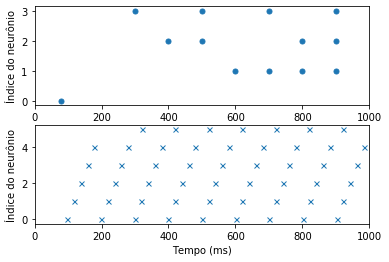

In [50]:
# Porta lógica OR com 3 entradas + clock
# Clock com 5 neurônios (20ms cada neurônio = 100 ms)
# Input com SpikeGeneratorGroup

from brian2 import * 
%matplotlib inline
start_scope() # clears the workspace of previous Brian objects

N = 6 # Número de neurônios (0 a N-1)
vrest = -70.0*mV # Potencial de repouso
tau = 10*ms 
R = 100*Mohm
w_exc = 11*mV # Peso sináptico excitatório
w_exc_OR = 6*mV # Peso sináptico excitatório da porta OR de 3 enntradas
#w_inh = -10*mV # Peso sináptico inibitório
delay_syn = 20*ms

# Modelo LIF - Leaky Integrate and Fire
eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação de neurônios de estímulo
indices = array([0,
                      3,
                   2,
                   2, 3,
                1,
                1,    3,
                1, 2,
                1, 2, 3])
times = array([78,
                        300,
                   400,
                   500, 500,
              600,
              700,      700,
              800, 800,
              900, 900, 900])*ms
input = SpikeGeneratorGroup(4, indices, times )

# Criação dos neurônios comuns
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=5*ms, method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 

# create stimulus connections
Stimulus = Synapses(input, neurons, on_pre='v_post += w_exc', delay=delay_syn )
Stimulus.connect(i=0, j=0);

#Criação da sinapse excitatória do clock
syn_ex = Synapses(neurons, neurons, on_pre='v_post += w_exc', delay=delay_syn)
syn_ex.connect(i=0, j=1) # Clock
syn_ex.connect(i=1, j=2) 
syn_ex.connect(i=2, j=3)
syn_ex.connect(i=3, j=4)
syn_ex.connect(i=4, j=0)

#Criação das sinapses de porta OR
Stimulus_OR = Synapses(input, neurons, on_pre='v_post += w_exc_OR', delay=delay_syn )
Stimulus_OR.connect(i=1, j=5);
Stimulus_OR.connect(i=2, j=5);
Stimulus_OR.connect(i=3, j=5);
syn_ex_OR = Synapses(neurons, neurons, on_pre='v_post += w_exc_OR', delay=delay_syn)
syn_ex_OR.connect(i=0, j=5) 

#Criação da sinapse inibitória
#syn_in = Synapses(neurons, neurons, on_pre='v_post += w_inh', delay=delay_syn)
#syn_in.connect(i=6, j=0)

#Funções para extrair dados da simulação 
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon = SpikeMonitor(neurons)
rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede

spike_mon_st = SpikeMonitor(input)

#Valores iniciais de tensão e corrente na entrada dos neurônios
#neurons.v = -80*mV
#neurons.I = 0*pA 
run(1000*ms)

subplot(211)
plot(spike_mon_st.t/ms, spike_mon_st.i, 'o', markersize = 5)
xlabel('Tempo (ms)'); xlim(0, 1000)
ylabel('Índice do neurônio')

subplot(212)
plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)'); xlim(0, 1000)
ylabel('Índice do neurônio')


Text(0, 0.5, 'Índice do neurônio')

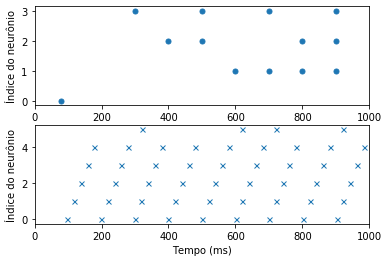

In [56]:
# Porta lógica OR com 3 entradas + clock, sendo a entrada 2 inibitória
# Clock com 5 neurônios (20ms cada neurônio = 100 ms)
# Input com SpikeGeneratorGroup

from brian2 import * 
%matplotlib inline
start_scope() # clears the workspace of previous Brian objects

N = 6 # Número de neurônios (0 a N-1)
vrest = -70.0*mV # Potencial de repouso
tau = 10*ms 
R = 100*Mohm
w_exc = 11*mV # Peso sináptico excitatório
w_exc_OR = 6*mV # Peso sináptico excitatório da porta OR de 3 enntradas
w_inh_OR = -6*mV # Peso sináptico inibitório
delay_syn = 20*ms

# Modelo LIF - Leaky Integrate and Fire
eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação de neurônios de estímulo
indices = array([0,
                      3,
                   2,
                   2, 3,
                1,
                1,    3,
                1, 2,
                1, 2, 3])
times = array([78,
                        300,
                   400,
                   500, 500,
              600,
              700,      700,
              800, 800,
              900, 900, 900])*ms
input = SpikeGeneratorGroup(4, indices, times )

# Criação dos neurônios comuns
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=5*ms, method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 

# create stimulus connections
Stimulus = Synapses(input, neurons, on_pre='v_post += w_exc', delay=delay_syn )
Stimulus.connect(i=0, j=0);

#Criação da sinapse excitatória do clock
syn_ex = Synapses(neurons, neurons, on_pre='v_post += w_exc', delay=delay_syn)
syn_ex.connect(i=0, j=1) # Clock
syn_ex.connect(i=1, j=2) 
syn_ex.connect(i=2, j=3)
syn_ex.connect(i=3, j=4)
syn_ex.connect(i=4, j=0)

#Criação das sinapses de porta OR
Stimulus_OR = Synapses(input, neurons, on_pre='v_post += w_exc_OR', delay=delay_syn )
Stimulus_OR.connect(i=1, j=5);
Stimulus_OR.connect(i=3, j=5);

Stimulus_OR_inh = Synapses(input, neurons, on_pre='v_post += w_inh_OR', delay=delay_syn )
Stimulus_OR_inh.connect(i=2, j=5);

syn_ex_OR = Synapses(neurons, neurons, on_pre='v_post += w_exc_OR', delay=delay_syn)
syn_ex_OR.connect(i=0, j=5) 


#Funções para extrair dados da simulação 
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon = SpikeMonitor(neurons)
rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede
spike_mon_st = SpikeMonitor(input)

run(1000*ms)

subplot(211)
plot(spike_mon_st.t/ms, spike_mon_st.i, 'o', markersize = 5)
xlabel('Tempo (ms)'); xlim(0, 1000)
ylabel('Índice do neurônio')

subplot(212)
plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)'); xlim(0, 1000)
ylabel('Índice do neurônio')

Text(0, 0.5, 'Índice do neurônio')

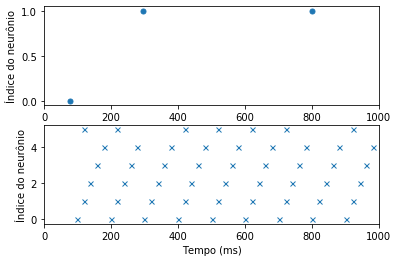

In [22]:
# Porta lógica NOT com 1 entrada + clock
# Clock com 5 neurônios (20ms cada neurônio = 100 ms)
# Input com SpikeGeneratorGroup

from brian2 import * 
%matplotlib inline
start_scope() # clears the workspace of previous Brian objects

N = 6 # Número de neurônios (0 a N-1)
vrest = -70.0*mV # Potencial de repouso
tau = 10*ms 
R = 100*Mohm
w_exc = 11*mV # Peso sináptico excitatório
w_inh = -11*mV # Peso sináptico inibitório
delay_syn = 20*ms

# Modelo LIF - Leaky Integrate and Fire
eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação de neurônios de estímulo
indices = array([0,1,1])
times = array([78,295,800])*ms
input = SpikeGeneratorGroup(2, indices, times )

# Criação dos neurônios comuns
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=5*ms, method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 

# create stimulus connections
Stimulus = Synapses(input, neurons, on_pre='v_post += w_exc', delay=delay_syn )
Stimulus.connect(i=0, j=0); 

#Criação da sinapse excitatória do clock
syn_ex = Synapses(neurons, neurons, on_pre='v_post += w_exc', delay=delay_syn)
syn_ex.connect(i=0, j=1) # Clock
syn_ex.connect(i=1, j=2) 
syn_ex.connect(i=2, j=3)
syn_ex.connect(i=3, j=4)
syn_ex.connect(i=4, j=0)

syn_ex.connect(i=0, j=5)

# create inhibitory connections
Inhibitory = Synapses(input, neurons, on_pre='v_post += w_inh', delay=delay_syn )
Inhibitory.connect(i=1, j=5);


#Funções para extrair dados da simulação 
#state_mon = StateMonitor(neurons, 'v', record = True)
#spike_mon = SpikeMonitor(neurons)
#rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede
spike_mon_st = SpikeMonitor(input)
spike_mon = SpikeMonitor(neurons)

run(1000*ms)

subplot(211)
plot(spike_mon_st.t/ms, spike_mon_st.i, 'o', markersize = 5)
xlabel('Tempo (ms)'); xlim(0, 1000)
ylabel('Índice do neurônio')

subplot(212)
plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)'); xlim(0, 1000)
ylabel('Índice do neurônio')



Text(0, 0.5, 'Índice do neurônio')

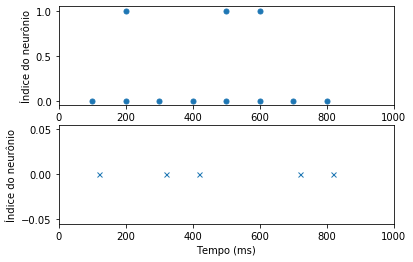

In [19]:
# Porta lógica NOT com 1 entrada + clock
# Clock e Input com SpikeGeneratorGroup

from brian2 import * 
%matplotlib inline
start_scope() # clears the workspace of previous Brian objects

#N = 5 # Número de neurônios (0 a N-1)
vrest = -70.0*mV # Potencial de repouso
tau = 10*ms 
R = 100*Mohm
w_exc = 11*mV # Peso sináptico excitatório
w_inh = -11*mV # Peso sináptico inibitório
delay_syn = 20*ms

# Modelo LIF - Leaky Integrate and Fire
eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação de neurônios de estímulo
indices = array([0,0,1,0,0,0,1,0,1,0,0])
times = array([100,200,200,300,400,500,500,600,600,700,800])*ms
input = SpikeGeneratorGroup(2, indices, times )

# Criação dos neurônios comuns
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=5*ms, method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 

# Criação do neurônio Not Logic
#neurons_inv = NeuronGroup(1, eqs, threshold='v>=-70.0*mV', reset='v=vrest', refractory=100*ms, method='linear')
#neurons_inv.v = -70.0*mV
#neurons_inv.I = 0*pA 

# create stimulus connections
#Stimulus = Synapses(input, neurons, on_pre='v_post += w_exc', delay=delay_syn )
#Stimulus.connect(i=0, j=0);

#Criação da sinapse excitatória do clock
#syn_ex = Synapses(neurons, neurons, on_pre='v_post += w_exc', delay=delay_syn)
#syn_ex.connect(i=0, j=1) # Clock
#syn_ex.connect(i=1, j=2) 
#syn_ex.connect(i=2, j=3)
#syn_ex.connect(i=3, j=4)
#syn_ex.connect(i=4, j=0)

#Criação das sinapses da porta Inversora
Stimulus_inv = Synapses(input, neurons, on_pre='v_post += w_inh', delay=delay_syn )
Stimulus_inv.connect(i=1, j=0);

Stimulus_inv_clk = Synapses(input, neurons, on_pre='v_post += w_exc', delay=delay_syn )
Stimulus_inv_clk.connect(i=0, j=0);


#Funções para extrair dados da simulação 
#state_mon = StateMonitor(neurons, 'v', record = True)
#spike_mon = SpikeMonitor(neurons)
#rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede
spike_mon_st = SpikeMonitor(input)
spike_mon_inv = SpikeMonitor(neurons)

run(1000*ms)

subplot(211)
plot(spike_mon_st.t/ms, spike_mon_st.i, 'o', markersize = 5)
xlabel('Tempo (ms)'); xlim(0, 1000)
ylabel('Índice do neurônio')

subplot(212)
plot(spike_mon_inv.t/ms, spike_mon_inv.i, 'x', markersize = 5)
xlabel('Tempo (ms)'); xlim(0, 1000)
ylabel('Índice do neurônio')